In [1]:
from perceptron import *
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('perceptron-train.csv',names=['target','col1','col2'])
test = pd.read_csv('perceptron-test.csv',names=['target','col1','col2'])

In [3]:
train['col2'] = (train['col2'] - train['col2'].mean()) / train['col2'].std()

test['col2'] = (test['col2'] - test['col2'].mean()) / test['col2'].std()

In [4]:
test.head()

,target,col1,col2
0,-1.0,1.651437,1.220010
1,1.0,-0.866495,1.083781
2,-1.0,0.789828,-0.469184
3,-1.0,0.179549,1.799168
4,1.0,-0.434351,0.503610


In [5]:
x_train = train[['col1','col2']].to_numpy()
y_train = train['target'].to_numpy().reshape(-1,1)

x_test = test[['col1','col2']].to_numpy()
y_test = test['target'].to_numpy().reshape(-1,1)

In [6]:
x_train.size

600

In [7]:
x_train.shape

(300, 2)

In [8]:
clf = Perceptron(taxa_aprendizado=1e-2,limiar_ativacao= 0)

clf.fit(x_train,y_train)

y_hat = clf.predict(x_test)

Peso Epoch 0: [0.         0.52878071 0.3784417 ]
Peso Epoch 1: [ 6.93889390e-18 -2.44482544e-02 -4.84941249e-02]
Peso Epoch 2: [ 0.02       -0.02771957 -0.04838951]
Peso Epoch 3: [ 6.93889390e-18 -3.35199497e-02 -4.64626863e-02]
Peso Epoch 4: [ 6.93889390e-18 -2.64694265e-02 -4.94044820e-02]
Peso Epoch 5: [ 6.93889390e-18 -3.00687774e-02 -5.15764150e-02]
Peso Epoch 6: [ 6.93889390e-18 -2.59122251e-02 -3.62706225e-02]
Peso Epoch 7: [ 6.93889390e-18 -2.46950070e-02 -5.13479146e-02]
Peso Epoch 8: [ 6.93889390e-18 -3.22347825e-02 -5.10768802e-02]
Peso Epoch 9: [ 6.93889390e-18 -2.62805110e-02 -4.56658227e-02]
Peso Epoch 10: [ 6.93889390e-18 -3.36838095e-02 -5.11192911e-02]
Peso Epoch 11: [ 6.93889390e-18 -2.64580148e-02 -3.61200161e-02]
Peso Epoch 12: [ 6.93889390e-18 -2.52407967e-02 -5.11973082e-02]
Peso Epoch 13: [ 6.93889390e-18 -2.93092358e-02 -4.04129782e-02]
Peso Epoch 14: [ 6.93889390e-18 -3.26874656e-02 -5.03664786e-02]
Peso Epoch 15: [ 0.02       -0.04126163 -0.04492048]
Peso Epoc

In [9]:
accuracy_score(y_train, clf.predict(x_train)) ,accuracy_score(y_test,y_hat)

(0.8133333333333334, 0.84)

In [10]:
c1= np.linspace(-3,3,1000)
c2 = (-c1 * clf.pesos[1]/clf.pesos[2]) + clf.pesos[0]

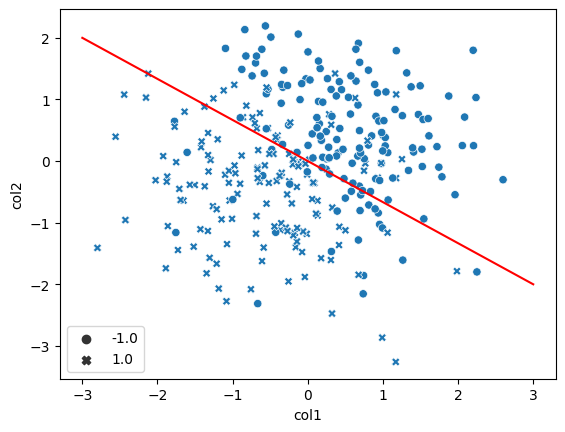

In [11]:
sns.scatterplot(data = train, x='col1',y='col2',style='target')
sns.lineplot(x=c1,y=c2,color='red')
plt.savefig('Best result, acc_test: 0.85 and acc_train: 0.82.png')

In [12]:
clf.histpeso

{'0': array([0.        , 0.52878071, 0.3784417 ]),
 '1': array([ 6.93889390e-18, -2.44482544e-02, -4.84941249e-02]),
 '2': array([ 0.02      , -0.02771957, -0.04838951]),
 '3': array([ 6.93889390e-18, -3.35199497e-02, -4.64626863e-02]),
 '4': array([ 6.93889390e-18, -2.64694265e-02, -4.94044820e-02]),
 '5': array([ 6.93889390e-18, -3.00687774e-02, -5.15764150e-02]),
 '6': array([ 6.93889390e-18, -2.59122251e-02, -3.62706225e-02]),
 '7': array([ 6.93889390e-18, -2.46950070e-02, -5.13479146e-02]),
 '8': array([ 6.93889390e-18, -3.22347825e-02, -5.10768802e-02]),
 '9': array([ 6.93889390e-18, -2.62805110e-02, -4.56658227e-02]),
 '10': array([ 6.93889390e-18, -3.36838095e-02, -5.11192911e-02]),
 '11': array([ 6.93889390e-18, -2.64580148e-02, -3.61200161e-02]),
 '12': array([ 6.93889390e-18, -2.52407967e-02, -5.11973082e-02]),
 '13': array([ 6.93889390e-18, -2.93092358e-02, -4.04129782e-02]),
 '14': array([ 6.93889390e-18, -3.26874656e-02, -5.03664786e-02]),
 '15': array([ 0.02      , -0.04

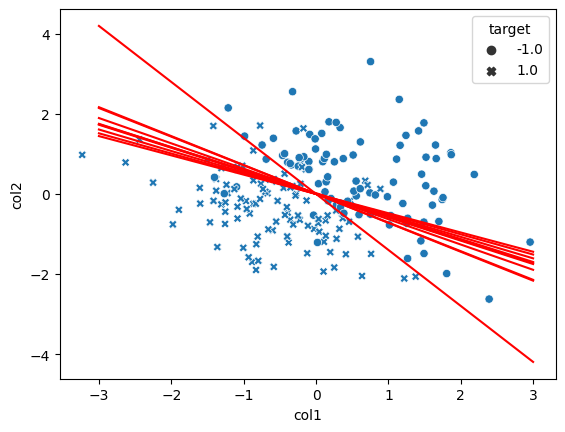

In [13]:
for x in range(10):
    peso = clf.histpeso[f"{x}"]
    c1= np.linspace(-3,3,1000)
    c2 = (-c1 * peso[1]/peso[2]) + peso[0]
    sns.lineplot(x=c1,y=c2,color='red')
sns.scatterplot(data = test, x='col1',y='col2',style='target')
plt.savefig('Training.png')    